## Notebook for gridding 30 m ATL08 between 50-52 N

In [1]:
#always add and run this to load MAAP functions
from maap.maap import MAAP
maap = MAAP()

import ipycmc
w = ipycmc.MapCMC()


## Load User Packages

In [2]:
#load some other functions from maap.maap import MAAP
import ipycmc
import sys
import maap
import json
import sys
import shutil
import requests
import os
from os import system
from multiprocessing import pool
maap = MAAP()

In [3]:
from os import path
curr_dir = wk_dir = os.path.dirname(os.path.realpath('__file__'))
print(curr_dir)

/projects/r2d2/icesat2nb211_repo


## Download Example Data to Workspace (Optional)
Several functions have been made available from the MAAP dev team to facilitate data search and download. 

First, load the packages, then do a search!

In [4]:
#Step 2 - pull some data over area of interest
#First, run function to return a list of granules toward batch processing
def get_granules_list(granules):
    url_list = []
    output_list = []
    for res in granules:
        url_list.append(res.getDownloadUrl())

    for url in url_list:
        if url[0:5] == 's3://':
            url = url[5:].split('/')
            url[0] += '.s3.amazonaws.com'
            url = 'https://' + '/'.join(url)
        #print(url)
        output_list.append(url)
    return output_list

In [5]:
#Step 2 cont.
#function to download a list of granules locally
def download_granules(granules, output_dir):
    url_list = []
    for res in granules:
        url_list.append(res.getDownloadUrl())

    for url in url_list:
        if url[0:5] == 's3://':
            url = url[5:].split('/')
            url[0] += '.s3.amazonaws.com'
            url = 'https://' + '/'.join(url)
        print(url)
        name = output_dir + url.split('/')[-1]
        print(name)
        r = requests.get(url, allow_redirects=True)
        open(name, 'wb').write(r.content)

In [6]:
from multiprocessing import Pool
#def download_granule(granule, output_dir='/projects/r2d2/gedi_test_granules_congo/'):
def download_granule(granule, output_dir='/projects/r2d2/icesat2nb211_repo/test_data'):
    url = granule.getDownloadUrl()
    url = url[5:].split('/')
    url[0] += '.s3.amazonaws.com'
    url = 'https://' + '/'.join(url)
    name = output_dir + url.split('/')[-1]
    if not os.path.exists(name):
        try:
            print(name)
            with requests.get(url, stream=True, allow_redirects=True) as r:
                r.raise_for_status()
                with open(name, 'wb') as f:
                    for chunk in r.iter_content(chunk_size=8192): 
                        f.write(chunk)
        except Exception as e:
            print(e)
        

## Grab some test data from output directory

In [3]:
#Step 6: analyze results
#move all output csv files from super nested dps_output folder to a folder of interest
import os, glob
import shutil
output_dir = "/projects/icesat2nb211_repo/test_data2"
base_dir = "/projects/r2d2/dps_output/run_rebinning_ubuntu"
for file in glob.glob("/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/05/21/**/*.h5", recursive=True):
    print(file)
    shutil.copyfile(file, os.path.join(output_dir, os.path.basename(file)))

/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/01/14/30/330527/ATL08_30m_20190406232656_01330304_003_01.h5
/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/06/01/33/021141/ATL08_30m_20190407005548_01340303_003_01.h5
/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/10/49/05/858152/ATL08_30m_20190407023006_01350303_003_01.h5
/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/11/21/10/712546/ATL08_30m_20190407023531_01350304_003_01.h5
/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/15/46/58/835804/ATL08_30m_20190407024040_01350305_003_01.h5
/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/15/54/18/835241/ATL08_30m_20190407040948_01360304_003_01.h5
/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/18/50/41/030706/ATL08_30m_20190407041457_01360305_003_01.h5
/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/04/08/19/20/49/634059/ATL08_30m_20190407042022_01360306_003_01.h5


## Test Gridding code on Test Data
We are running gedipy, which has several dependencies that need to be installed before it can be run via dps, see gedipy_dependencies.txt
file = "/icesat2n211_repo/test_data/ATL08_30m_20190407042022_01360306_003_01.h5"
from the command line run extract_atl08.py on a single file:

**python setup.py install**

**ls -d -1 $PWD/* > ice2_30_test_list.txt**
GEDI grid over Gabon example:
**gedipy_grid -d rh -f ice2_30_test_list.txt -R 1000 -i 98 -b 7.0 8.0 34.0 -7.0 test_out.tif**

ICESat-2 30 grid in north america between 50-52
**gedipy_grid -d land_segments/30m_segment/h_canopy -R 9000 -F /projects/r2d2/icesat2nb211_repo/test_data/ATL08_30m_20190406232656_01330304_003_01.h5 -u grid_moments -b -127.0 52.0 -60.0 50.0 test2.tif**

gedipy_grid -d land_segments/30m_segment/h_canopy -R 9000 -f ice2_30_test_list.txt -u grid_moments -b -127.0 52.0 -60.0 50.0 -o test5.tif

gedipy_grid -d land_segments/30m_segment/gedi_rh_98 -R 9000 -f ice2_30_test_list.txt -u grid_moments -b -127.0 52.0 -60.0 50.0 -o test6.tif

gedipy_grid -d land_segments/30m_segment/atl03_rh_98 -R 9000 -f ice2_30_test_list.txt -u grid_moments -b -127.0 52.0 -60.0 50.0 -o test7.tif

gedipy_grid -d h_max_canopy -R 9000 -f ice2_30_test_list.txt -u grid_moments -b -127.0 52.0 -60.0 50.0 -o test8.tif

Create text file:
ls -d -1 $PWD/*.h5 > testfile3.txt

-d id dataset
-f is textfile with a list of all the files to grid or a single file
-R is the resolution (1000 = 1km)
-b is the bounding box of minx maxy maxx miny

## Check the Output Visually

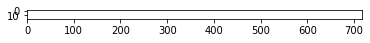

In [63]:
## load packages
from osgeo import gdal
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from glob import glob
from rasterio.plot import show
file= '/projects/icesat2nb211_repo/test_data2/test5.tif'
grid = rasterio.open(file).read(1,masked=True)
plt.imshow(grid,vmin=0,vmax=40,cmap='Reds')


## Step 4 - scale up! Register code in GitLab and do a test run
You can use an algorithm already registered and available under the DPS/MAS Operations List Algorithms
Or you can push your own algorithm to GitLab, register it, and run it
First, example of using an algorithm that is already registered (that is just extract_atl08.py)

In [32]:
# Step 5 - run a DPS job!
#first, pick the files you want to run in DPS
#bounding box North America north of 50 degrees lat
gedi_granules=maap.searchGranule(collection_concept_id="C1200231029-NASA_MAAP", limit=2)
gedi_granule_id = get_granules_list(gedi_granules)

#print(gedi_granules[1]["ProducerGranuleId"])

In [33]:
#Step 5 cont.
import json
from maap.maap import MAAP

#try to submit a MAAP job on a single file
#list of files from the 30m DPS output
all_files = glob.glob("/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/05/**/*.tif", recursive=True)
tempfile = all_files[0]
new_string = tempfile.replace("/projects", "")

input_files = ["https://maap-ops-dataset.s3.amazonaws.com" + new_string]

maap = MAAP(maap_host="api.maap-project.org")
job = maap.submitJob(identifier="beebee8", algo_id="above_concat_ubuntu",
                     version="master",
                     username="beebee8",
                     queue="maap-ops-worker-2-16gb",
                     atl08_csvs=json.dumps(input_files))
print(job)

all_files = Fname=os.path.basename(file)
Outname='somename_{}'.fornat(Fname)

dps_inputs= ['dataset', 'resolution', 'index', 'minx', 'maxy', 'maxx', 'miny', 'output']
granule=gedi_granule_id[1]
granule_orbit=gedi_granules[1]
orbit = granule_orbit['Granule']['DataGranule']['ProducerGranuleId'][23:29]
outname= 'gedi02_a_rh98_congo_{}.tif'.format(orbit)
    
result = maap.submitJob(identifier='gedi',
                        algo_id='run_gedipy_ubuntu',
                        version='master',
                        username='r2d2',
                        dataset= 'land_segments/30m_segment/gedi_rh_98',
                        resolution= 1000,
                        u= grid_moments,
                        minx= -129.0,
                        maxy= 52.0,
                        maxx= 10.0,
                        miny= 50.0,
                        input_data=granule,
                        output= outname
)
print(result)

{'status': 'success', 'http_status_code': 200, 'job_id': '3b54af75-8fd7-42e2-87ad-5a008deac59e'}


## Step 5 - Submit many jobs in a loop!

In [23]:
#Step 5 cont.
#submit many jobs in a loop to process many files
#gedi_granules=maap.searchGranule(collection_concept_id="C1200231029-NASA_MAAP", limit=10000)
#gedi_granule_id = get_granules_list(gedi_granules)
all_files = glob.glob("/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/05/**/*.tif", recursive=True)
tempfile = all_files[0]
new_string = tempfile.replace("/projects", "")

input_files = ["https://maap-ops-dataset.s3.amazonaws.com" + new_string]



#ices_granule_id is the list of all the files, this loops through and submits a job for each
dps_inputs= ['dataset', 'resolution', 'index', 'minx', 'maxy', 'maxx', 'miny', 'output']

for g in range(1, len(all_files)):
    granule = all_files[g]
    tempfile = granule.replace("/projects", "")
    infile = ["https://maap-ops-dataset.s3.amazonaws.com" + new_string]
    outname=os.path.basename(infile) 
    outname='atl0830m_{}.tif'.format(Fname)
    submit_result = maap.submitJob(identifier='gedi',
                                   algo_id='run_gedipy_ubuntu',
                                   version='master',
                                   username='r2d2',
                                   dataset= 'rh',
                                   resolution= 1000,
                                   #i= 98,
                                   u = 'grid_moments'
                                   minx= -129.0,
                                   maxy= 52.0,
                                   maxx= -66.0,
                                   miny= 50.0,
                                   input_data=infile,
                                   output= outname
                                  )
    if g == 100:
        print(submit_result)
    if g == 500:
        print(submit_result)
    if g == 1000:
        print(submit_result)

{'status': 'success', 'http_status_code': 200, 'job_id': '0000609e-dd8c-4547-b5a4-642e41da69f0'}
{'status': 'success', 'http_status_code': 200, 'job_id': '2c708152-0237-49e3-9cf1-e44e4e7fe13e'}
{'status': 'success', 'http_status_code': 200, 'job_id': '89734d99-7488-42cd-b1c9-1e9158b49cf3'}


## Step 6 Combine DPS Outputs
The DPS jobs will all put outputs in the folder of whoever ran the job (in my case r2d2).

This will be in a nested directory based on time stamp - typically to combine outputs we want them all in a single directory. 

This code snippet combines those outputs and puts them in a user defined workspace.

In [24]:
#Step 6: analyze results
#move all output csv files from super nested dps_output folder to a folder of interest
import os, glob
import shutil
output_dir = "/projects/r2d2/gedi_gridded_granules_global"
base_dir = "/projects/r2d2/dps_output/run_gedipy_v2_ubuntu"
for file in glob.glob("/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/**/*.tif", recursive=True):
    print(file)
    shutil.copyfile(file, os.path.join(output_dir, os.path.basename(file)))

/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/04/33/31/811749/gedi02_a_rh98_congo_O01960.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/23/11/313766/gedi02_a_rh98_congo_O01996.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/24/31/430685/gedi02_a_rh98_congo_O01971.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/24/52/487992/gedi02_a_rh98_congo_O01960.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/06/521360/gedi02_a_rh98_congo_O01962.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/11/143133/gedi02_a_rh98_congo_O01970.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/12/208407/gedi02_a_rh98_congo_O01990.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/13/542957/gedi02_a_rh98_congo_O01966.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/16/470459/gedi02_a_rh98_congo_O01

In [18]:
print(len(os.listdir('/projects/r2d2/gedi_gridded_granules')))

1114


## Step 7 Run a script to combine output grids
combine_grid.py is a function that takes input geotiffs and iteratively combines the running means and variances per pixel.

To run this, create a text file that lists all of the geotiff files as an input.

To create the input filelist, navigate to that directory and type:

ls -1 /projects/r2d2/gedi_gridded_granules/*.tif > /projects/gedi_gridding/tif_filelist.txt

python combine_grids.py -f tif_filelist.txt -o gedi_congo_grid_combined.tif


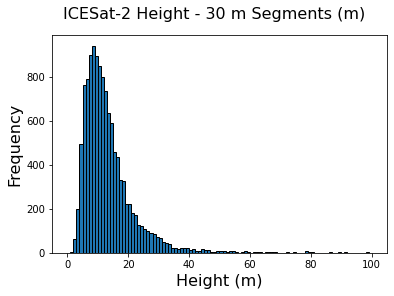

In [60]:
data_path = '/projects/r2d2/30m_atl08_h_canopoy.tif'

with rasterio.open(data_path) as ice2_grid:
    htband = ice2_grid.read(1)
    idx = htband > 0

cnt,ht = np.histogram(htband[idx], bins=100, range=[0,100])

fig, ax = plt.subplots()
fig.suptitle('ICESat-2 Height - 30 m Segments (m)', fontsize=16)
ax.bar(ht[:-1], cnt, width=np.diff(ht), edgecolor='black', align='edge')
ax.set_xlabel('Height (m)', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
plt.show()
